In [724]:
import pandas as pd 
import numpy as np
import keras 
df = pd.read_csv('scripts.csv')
from sklearn.model_selection import train_test_split
import nltk
from nltk.tokenize import word_tokenize
np.random.seed(0)
from sklearn.feature_extraction import text

In [725]:
df=df.drop(['Unnamed: 0', 'EpisodeNo', 'SEID', 'Season'], axis=1)


In [726]:
jerry=df[(df["Character"]=="JERRY")]
# jerry=jerry.reset_index()
# jerry=jerry.drop('index', axis=1)
jerry=jerry.sample(n=10000)

In [730]:
elaine=df[(df["Character"]=="ELAINE")]
george=df[(df["Character"]=="GEORGE")]
kramer=df[(df["Character"]=="KRAMER")]

In [729]:
dial_df=pd.DataFrame()

In [734]:
dial_df=dial_df.append([jerry, elaine, george, kramer])
dial_df.head()

,Character,Dialogue
42624,JERRY,I guess we like to think we've progressed beyo...
6254,JERRY,"Well, ah w-what do you recommend my good fellow?"
51836,JERRY,So I guess I'll s--
25860,JERRY,"Alright, Kramer!"
3598,JERRY,Too romantic.


In [665]:
dial_df = df[(df["Character"]=="JERRY")| (df["Character"]=="ELAINE") | (df["Character"]=="GEORGE") | (df["Character"]=="KRAMER")]
george_dialogue_df=dial_df[dial_df.Character=='GEORGE']
elaine_dialogue_df=dial_df[dial_df.Character=='ELAINE']
kramer_dialogue_df=dial_df[dial_df.Character=='KRAMER']
jerry_dialogue_df=dial_df[dial_df.Character=='JERRY']


In [661]:
len(df[df["Character"]=="JERRY"]), len(george_dialogue_df)

(14786, 9708)

In [689]:
jerry=pd.DataFrame()
jerry=jerry.append(df[(df["Character"]=="JERRY")])
jerry=jerry.reset_index()

In [132]:
def combine_dialogues(dialogue):
    dialogues=''
    for i in dialogue: 
        dialogues=dialogues+(i)
    return dialogues

because Jerry has substaintially more dialogue than the rest of the cast member, i've taken him out 

In [645]:
from nltk.corpus import stopwords
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)
def text_process(dialogue):
    nopunc=[word.lower() for word in dialogue if word not in stop_words]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split()]


using tfidf 

In [507]:
#set target and scaler 
X = dial_df["Dialogue"]
y = dial_df["Character"]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=lines).fit(X)
X = vectorizer.transform(X)

In [394]:
dial_df

,Unnamed: 0,Character,Dialogue,EpisodeNo,SEID,Season
0,0,JERRY,Do you know what this is all about? Do you kno...,1.0,S01E01,1.0
1,1,JERRY,"(pointing at Georges shirt) See, to me, that b...",1.0,S01E01,1.0
2,2,GEORGE,Are you through?,1.0,S01E01,1.0
3,3,JERRY,"You do of course try on, when you buy?",1.0,S01E01,1.0
4,4,GEORGE,"Yes, it was purple, I liked it, I dont actuall...",1.0,S01E01,1.0
5,5,JERRY,"Oh, you dont recall?",1.0,S01E01,1.0
6,6,GEORGE,"(on an imaginary microphone) Uh, no, not at th...",1.0,S01E01,1.0
7,7,JERRY,"Well, senator, Id just like to know, what you ...",1.0,S01E01,1.0
9,9,GEORGE,"Are, are you sure this is decaf? Wheres the or...",1.0,S01E01,1.0
11,11,JERRY,"Can you relax, its a cup of coffee. Claire is ...",1.0,S01E01,1.0


In [175]:
print(len(vectorizer.vocabulary_))
num_vocabs=len(vectorizer.vocabulary_)

17897


In [176]:
#import deep learning stuff
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [177]:
# Encoding categorical data using label encoding and one-hot encoding 
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
y = labelencoder.fit_transform(y)
y = y.reshape(-1,1)
#one hotencode the target values 
y = onehotencoder.fit_transform(y).toarray()

In [172]:
y.shape

(39781, 5)

In [178]:
y = np.delete(y,3,1).astype(int)

In [179]:
y.shape

(39781, 4)

In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

create model (3 layers since text is more complex than number analysis) 

In [182]:
max_words = num_vocabs
num_classes = 4
#initiate model 
model = Sequential()
#layer 1
model.add(Dense(512, activation= 'relu', input_shape=(max_words,)))
model.add(Dropout(0.5))

#layer 2
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.5))

#layer 3
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.5))

#final layer 
model.add(Dense(num_classes, activation='softmax'))


In [185]:
#compile model 
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

Train on 31824 samples, validate on 7957 samples

Epoch 1/5
31824/31824 [==============================] - 65s 2ms/step - loss: 0.1752 - acc: 0.7866 - val_loss: 2.1872 - val_acc: 0.4184

Epoch 2/5
31824/31824 [==============================] - 57s 2ms/step - loss: 0.1791 - acc: 0.7887 - val_loss: 2.0967 - val_acc: 0.4213

Epoch 3/5
31824/31824 [==============================] - 56s 2ms/step - loss: 0.1749 - acc: 0.7898 - val_loss: 2.2302 - val_acc: 0.4224

Epoch 4/5
31824/31824 [==============================] - 57s 2ms/step - loss: 0.1765 - acc: 0.7843 - val_loss: 2.2316 - val_acc: 0.4154

Epoch 5/5
31824/31824 [==============================] - 56s 2ms/step - loss: 0.1742 - acc: 0.7863 - val_loss: 2.2202 - val_acc: 0.4169


with Random Over Sampling (jerry has a lot more dialogues over other characters, accounting for sample imbalance) 

In [204]:
#reset target and scaler 
X = dial_df["Dialogue"]
y = dial_df["Character"]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=lines).fit(X)
X = vectorizer.transform(X)
# Apply the random over-sampling to account for larger sample size for Jerry
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(X, y)

In [205]:
labelencoder = preprocessing.LabelEncoder()
y = labelencoder.fit_transform(y_resampled)
y = y.reshape(-1,1)
#one hotencode the target values 
y = onehotencoder.fit_transform(y).toarray()
y = np.delete(y,3,1).astype(int)

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.2, random_state=123)

In [207]:
#initiate model 
model = Sequential()
#layer 1
model.add(Dense(256, activation= 'relu', input_shape=(max_words,)))
model.add(Dropout(0.5))

#layer 2
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.5))

#layer 3
model.add(Dense(64, activation= 'relu'))
model.add(Dropout(0.5))

#final layer 
model.add(Dense(num_classes, activation='softmax'))

#compile model 
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

with 5 epochs 

Train on 59144 samples, validate on 14786 samples

Epoch 5/5
59144/59144 [==============================] - 55s 934us/step - loss: 0.4332 - acc: 0.6770 - val_loss: 0.5777 - val_acc: 0.6002

with 25 epochs 

Train on 59144 samples, validate on 14786 samples

Epoch 24/25
59144/59144 [==============================] - 48s 809us/step - loss: 0.1946 - acc: 0.7687 - val_loss: 0.8687 - val_acc: 0.6302


Random Sampling plus CountVectorization (with max features limited to 8000, instead of 31824)

In [399]:
#reset target and scaler 
X = dial_df["Dialogue"]
y = dial_df["Character"]
from sklearn.feature_extraction.text import CountVectorizer
#limit max feature in count-vec 
vectorizer = CountVectorizer(max_features=8000, analyzer=text_process)
X = vectorizer.fit_transform(X)

In [403]:
X

<39781x8000 sparse matrix of type '<class 'numpy.int64'>'
	with 345160 stored elements in Compressed Sparse Row format>

In [315]:
ros = RandomOverSampler()
X_resampled, y_resampled = ros.fit_sample(X, y)

In [316]:
X_resampled

<73930x8000 sparse matrix of type '<class 'numpy.int64'>'
	with 631968 stored elements in Compressed Sparse Row format>

In [405]:
y = labelencoder.fit_transform(y_resampled)
y = y.reshape(-1,1)
#one hotencode the target values 
y = onehotencoder.fit_transform(y).toarray()
y = np.delete(y,3,1).astype(int)

In [406]:
print ('predicting on', y.shape[1], 'catagories with', y.shape[0], 'input')

predicting on 4 catagories with 73930 input


In [319]:
#fuction for deleting sparse matrix by index 
from scipy.sparse import csr_matrix

def delete_from_csr(mat, row_indices=[], col_indices=[]):
    """
    Remove the rows (denoted by ``row_indices``) and columns (denoted by ``col_indices``) from the CSR sparse matrix ``mat``.
    WARNING: Indices of altered axes are reset in the returned matrix
    """
    if not isinstance(mat, csr_matrix):
        raise ValueError("works only for CSR format -- use .tocsr() first")

    rows = []
    cols = []
    if row_indices:
        rows = list(row_indices)
    if col_indices:
        cols = list(col_indices)

    if len(rows) > 0 and len(cols) > 0:
        row_mask = np.ones(mat.shape[0], dtype=bool)
        row_mask[rows] = False
        col_mask = np.ones(mat.shape[1], dtype=bool)
        col_mask[cols] = False
        return mat[row_mask][:,col_mask]
    elif len(rows) > 0:
        mask = np.ones(mat.shape[0], dtype=bool)
        mask[rows] = False
        return mat[mask]
    elif len(cols) > 0:
        mask = np.ones(mat.shape[1], dtype=bool)
        mask[cols] = False
        return mat[:,mask]
    else:
        return mat

In [320]:
#pull out 1400 as test set 
test_indx=random.sample(range(1,73930), 14000)
#set aside test set for the scaler 
test = X_resampled[test_index]
#set aside train set for the scaler 
train = delete_from_csr(X_resampled, row_indices=[test_index])
#set aside test set for the target 
target_test = y[test_index]
#set aside train set for the target 
target_train =np.delete(y, test_index, axis=0)
#check test/train shape 
print ('test:', np.shape(test), 'target test:', np.shape(target_test), 'target train:', np.shape(target_train))
train

test: (1500, 8000) target test: (1500, 4) target train: (72430, 4)


<72430x8000 sparse matrix of type '<class 'numpy.int64'>'
	with 619356 stored elements in Compressed Sparse Row format>

create validation set 

In [735]:
#let's take the first 1000 cases out of the training set to become the validation set 
random.seed(123)
#set aside validation from scaler train
val = train[:1000]
train_final = train[1000:]
#set aside validation from target train 
target_val = target_train[:1000]
target_train_final = target_train[1000:]
print (np.shape(val), np.shape(train_final), np.shape(target_val), np.shape(target_train_final))

(1000, 8000) (36641, 8000) (1000, 3) (36641, 3)


In [325]:
print (np.shape(val), np.shape(train_final), np.shape(target_val), np.shape(target_train_final))

(1000, 8000) (71430, 8000) (1000, 4) (71430, 4)


Run Model 


In [333]:
#initiate model 
model = Sequential()
#layer 1
model.add(Dense(256, activation= 'relu', input_shape=(8000,)))
model.add(Dropout(0.5))

#layer 2
model.add(Dense(128, activation= 'relu'))
model.add(Dropout(0.5))

# #layer 3
# model.add(Dense(64, activation= 'relu'))
# model.add(Dropout(0.5))

#final layer 
model.add(Dense(4, activation='softmax'))

#compile model 
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model_val_1 = model.fit(train_final,target_train_final,
                    epochs=25,
                    batch_size=256,
                    validation_data=(val, target_val))

Train on 71430 samples, validate on 1000 samples
Epoch 1/25
71430/71430 [==============================] - 33s 456us/step - loss: 0.4220 - acc: 0.8274 - val_loss: 0.4708 - val_acc: 0.7615
Epoch 2/25
71430/71430 [==============================] - 37s 519us/step - loss: 0.3361 - acc: 0.8556 - val_loss: 0.4378 - val_acc: 0.7747
Epoch 3/25
71430/71430 [==============================] - 42s 591us/step - loss: 0.2974 - acc: 0.8724 - val_loss: 0.4371 - val_acc: 0.7760
Epoch 4/25
71430/71430 [==============================] - 28s 398us/step - loss: 0.2671 - acc: 0.8864 - val_loss: 0.4574 - val_acc: 0.7755
Epoch 5/25
71430/71430 [==============================] - 28s 394us/step - loss: 0.2460 - acc: 0.8966 - val_loss: 0.4551 - val_acc: 0.7813
Epoch 6/25
71430/71430 [==============================] - 29s 404us/step - loss: 0.2305 - acc: 0.9042 - val_loss: 0.4525 - val_acc: 0.7872
Epoch 7/25
71430/71430 [==============================] - 28s 396us/step - loss: 0.2177 - acc: 0.9110 - val_loss: 0.4

In [334]:
results_train = model.evaluate(train_final, target_train_final)
results_test = model.evaluate(test, target_test)
print ('train:', results_train, 'test:', results_test )

1500/1500 [==============================] - 0s 284us/step
train: [0.12763027144822311, 0.9673386532269355] test: [0.5969387178421021, 0.8098333333333333]


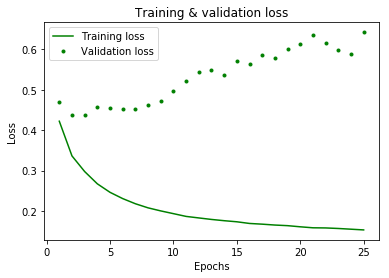

In [337]:
import matplotlib.pyplot as plt
model_val_dict_1 = model_val_1.history
plt.clf()
loss_values = model_val_dict_1['loss']
val_loss_values = model_val_dict_1['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g', label='Training loss')
plt.plot(epochs, val_loss_values, 'g.', label='Validation loss')

plt.title('Training & validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

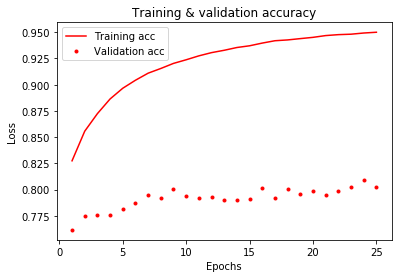

In [338]:
plt.clf()
acc_values = model_val_dict_1['acc'] 
val_acc_values = model_val_dict_1['val_acc']
plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'r.', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [375]:
test= df.Dialogue[29]
test

'So, you know, she calls and says she wants to go out with you tomorrow night? God bless! Devil you!'

In [387]:
test_vec=vectorizer.transform(['So, you know, she calls and says she wants to go out with you tomorrow night? God bless! Devil you!'
])

In [392]:
np.sum(model.predict(test_vec))

1.0000001

In [552]:
X_test = dial_df["Dialogue"]
vectorizer = CountVectorizer(analyzer=text_process)
X_test = vectorizer.fit_transform(X_test)
X_test


<39141x17716 sparse matrix of type '<class 'numpy.int64'>'
	with 349901 stored elements in Compressed Sparse Row format>

In [580]:
#feature min to 8000 features 
X = dial_df["Dialogue"]
vectorizer = CountVectorizer(max_features=8000, analyzer=text_process)
X = vectorizer.fit_transform(X)
X

<39141x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 313352 stored elements in Compressed Sparse Row format>

increase validation set 

In [630]:
#reset target and scaler 
X = dial_df["Dialogue"]
y = dial_df["Character"]

#limit max feature in count-vec 
vectorizer = CountVectorizer(max_features=8000, analyzer=text_process)
X = vectorizer.fit_transform(X)

#one hot encode the target values 
y = labelencoder.fit_transform(y)
y = y.reshape(-1,1)
#one hotencode the target values 
y = onehotencoder.fit_transform(y).toarray()
#avoid dummy variable 
y = np.delete(y,3,1).astype(int)


In [640]:
#pull out 1400 as test set 
test_indx=random.sample(range(1,39141), 4000)
#set aside test set for the scaler 
test = X_resampled[test_index]
#set aside train set for the scaler 
train = delete_from_csr(X_resampled, row_indices=[test_index])
#set aside test set for the target 
target_test = y[test_index]
#set aside train set for the target 
target_train =np.delete(y, test_index, axis=0)
#check test/train shape 
print ('test:', np.shape(test), 'target test:', np.shape(target_test), 'target train:', np.shape(target_train))
train

In [ ]:
#let's take the first 1000 cases out of the training set to become the validation set 
random.seed(123)
#set aside validation from scaler train
val = train[:1000]
train_final = train[1000:]
#set aside validation from target train 
target_val = target_train[:1000]
target_train_final = target_train[1000:]
print (np.shape(val), np.shape(train_final), np.shape(target_val), np.shape(target_train_final))

Build graphs to show the training and validation loss  / accuracy, and the different models 


In [340]:
#increase layers, decrease neuron size 

model_2 = Sequential()
#layer 1
model_2.add(Dense(513, activation= 'relu', input_shape=(8000,)))
model_2.add(Dropout(0.5))

#layer 2
model_2.add(Dense(64, activation= 'relu'))
model_2.add(Dropout(0.5))

#layer 2
model_2.add(Dense(32, activation= 'relu'))
model_2.add(Dropout(0.5))

#final layer 
model_2.add(Dense(4, activation='softmax'))

#compile model 
model_2.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model_val_2 = model_2.fit(train_final,target_train_final,
                    epochs=25,
                    batch_size=256,
                    validation_data=(val, target_val))

Train on 71430 samples, validate on 1000 samples
Epoch 1/25
71430/71430 [==============================] - 60s 836us/step - loss: 0.4452 - acc: 0.8212 - val_loss: 0.4927 - val_acc: 0.7620
Epoch 2/25
71430/71430 [==============================] - 47s 654us/step - loss: 0.3602 - acc: 0.8484 - val_loss: 0.4530 - val_acc: 0.7700
Epoch 3/25
71430/71430 [==============================] - 44s 617us/step - loss: 0.3240 - acc: 0.8626 - val_loss: 0.4558 - val_acc: 0.7632
Epoch 4/25
71430/71430 [==============================] - 45s 631us/step - loss: 0.2911 - acc: 0.8784 - val_loss: 0.4388 - val_acc: 0.7755
Epoch 5/25
71430/71430 [==============================] - 46s 641us/step - loss: 0.2638 - acc: 0.8934 - val_loss: 0.4411 - val_acc: 0.7885
Epoch 6/25
71430/71430 [==============================] - 45s 629us/step - loss: 0.2416 - acc: 0.9061 - val_loss: 0.4639 - val_acc: 0.7830
Epoch 7/25
71430/71430 [==============================] - 46s 637us/step - loss: 0.2253 - acc: 0.9157 - val_loss: 0.5

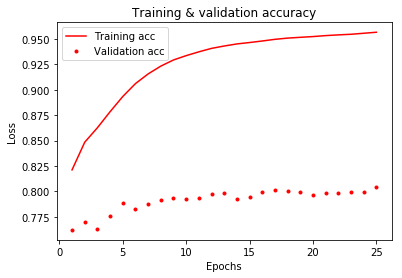

In [341]:
#graph accuracy 
model_val_dict_2 = model_val_2.history
plt.clf()
acc_values = model_val_dict_2['acc'] 
val_acc_values = model_val_dict_2['val_acc']
plt.plot(epochs, acc_values, 'r', label='Training acc')
plt.plot(epochs, val_acc_values, 'r.', label='Validation acc')
plt.title('Training & validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [345]:
#Try L2 regularization 
from keras import regularizers
model_3 = Sequential()
model_3.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.005), input_shape=(8000,))) #2 hidden layers
model_3.add(Dense(168, kernel_regularizer=regularizers.l1(0.005), activation='relu'))
model_3.add(Dense(4, activation='softmax'))

model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_val_3 = model_3.fit(train_final,target_train_final,
                    epochs=25,
                    batch_size=256,
                    validation_data=(val, target_val))

Train on 71430 samples, validate on 1000 samples
Epoch 1/25
71430/71430 [==============================] - 35s 484us/step - loss: 2.4566 - acc: 0.8008 - val_loss: 0.5755 - val_acc: 0.7680
Epoch 2/25
71430/71430 [==============================] - 29s 407us/step - loss: 0.5313 - acc: 0.8008 - val_loss: 0.5749 - val_acc: 0.7680
Epoch 3/25
71430/71430 [==============================] - 29s 407us/step - loss: 0.5310 - acc: 0.8008 - val_loss: 0.5749 - val_acc: 0.7680
Epoch 4/25
71430/71430 [==============================] - 31s 432us/step - loss: 0.5309 - acc: 0.8008 - val_loss: 0.5708 - val_acc: 0.7680
Epoch 5/25
71430/71430 [==============================] - 28s 399us/step - loss: 0.5307 - acc: 0.8008 - val_loss: 0.5741 - val_acc: 0.7680
Epoch 6/25
71430/71430 [==============================] - 29s 408us/step - loss: 0.5306 - acc: 0.8008 - val_loss: 0.5718 - val_acc: 0.7680
Epoch 7/25
71430/71430 [==============================] - 32s 444us/step - loss: 0.5305 - acc: 0.8008 - val_loss: 0.5

KeyboardInterrupt: 